In [1]:
# Import Libraries 
import pandas as pd 
import seaborn as sns

In [3]:
# Import Data 
cust=pd.read_csv("4. CREDIT CARD CASE STUDY - SEGMENTATION//4. CREDIT CARD CASE STUDY - SEGMENTATION//CC GENERAL.csv")

In [4]:
cust.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cust['CREDIT_LIMIT']=cust['CREDIT_LIMIT'].fillna(cust['CREDIT_LIMIT'].median())
cust['MINIMUM_PAYMENTS']=cust['MINIMUM_PAYMENTS'].fillna(cust['MINIMUM_PAYMENTS'].median())

In [6]:
cust.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(y):
    return pd.Series([y.count(), y.isnull().sum(), y.sum(), y.mean(), y.median(),  y.std(), y.var(), y.min(), y.dropna().quantile(0.01), y.dropna().quantile(0.05),y.dropna().quantile(0.10),y.dropna().quantile(0.25),y.dropna().quantile(0.50),y.dropna().quantile(0.75), y.dropna().quantile(0.90),y.dropna().quantile(0.95), y.dropna().quantile(0.99),y.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

def summary(x):
    num_var=[key for key in dict(x.dtypes) if dict(x.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
    y=x[num_var]
    summary=y.apply(lambda z: var_summary(z)).T
    return summary
    

In [8]:
summary(cust)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


In [9]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

def outlier(x):
    num_var=[key for key in dict(x.dtypes) if dict(x.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
    all_var=[key for key in dict(x.dtypes)]
    cat_var=list(set(all_var)-set(num_var))
    y=x[num_var]
    z=x[cat_var]
    y=y.apply(lambda o: outlier_capping(o))
    x=pd.concat([y,z],axis=1)
    return x

In [10]:
cust=outlier(cust)

In [11]:
cust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,C10002
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,C10004
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,C10005


In [12]:
summary(cust)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.379252e+06,936.229237,361.280000,1525.185179,2.326190e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333


### Deriving New KPI's 

In [13]:
# Monthly_Avg_Purchase 
cust['Monthly_avg_purchase']=cust['PURCHASES']/cust['TENURE']

In [14]:
# Monthly_Cash_Advance 
cust['Monthly_cash_advance']=cust['CASH_ADVANCE']/cust['TENURE'] 

In [15]:
# def categorical_cross(df,x,y):
#     for i in range(len(df[x])):
#         df[xy][i]=
#         if (df[x][i]==0) & (df[y][i]==0):
#             return 'none'
#         if (df[x][i]>0) & (df[y][i]>0):
#             return 'both'+str(x)+"&"+str(y)
#         if (df[x][i]>0) & (df[y][i]==0):
#             return str(x)
#         if (df[x][i]==0) & (df[y][i]>0):
#             return str(y)
    

In [16]:
def purchase(credit):
    
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'
    

In [17]:
cust['purchase_type']=cust.apply(purchase,axis=1)

In [18]:
cust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID,Monthly_avg_purchase,Monthly_cash_advance,purchase_type
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2.0,1000.0,201.802084,139.509787,0.000000,12.0,C10001,7.950000,0.000000,istallment
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,C10002,0.000000,536.912124,none
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12.0,C10003,64.430833,0.000000,one_off
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,7500.0,0.000000,312.343947,0.000000,12.0,C10004,124.916667,17.149001,one_off
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12.0,C10005,1.333333,0.000000,one_off


In [19]:
cust['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [20]:
#credit card utilization
cust['limit_usage']=cust.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [21]:
# Payments to MinPayments Ratio
cust['payment_minpay']=cust.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [24]:
import numpy as np

In [25]:
# log tranformation for Outlier or Extreme value Treatment 
cr_log=cust.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [26]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [27]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [28]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

In [30]:
# Average payment_minpayment ratio for each purchse type.
x=cust.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([7.04455389, 3.99980697, 5.40594344, 5.23112248])

In [32]:
import matplotlib.pyplot as plt

C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Mean payment_minpayment ratio for each purchse type')

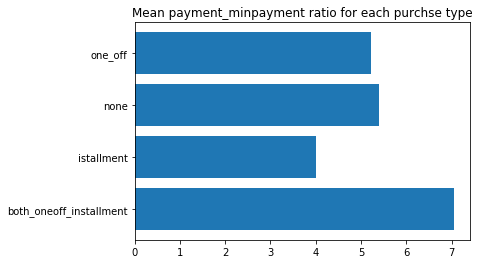

In [33]:
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(bottom=range(len(x)),width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


In [34]:
cust[cust['purchase_type']=='n']

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay


Text(0.5,1,'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

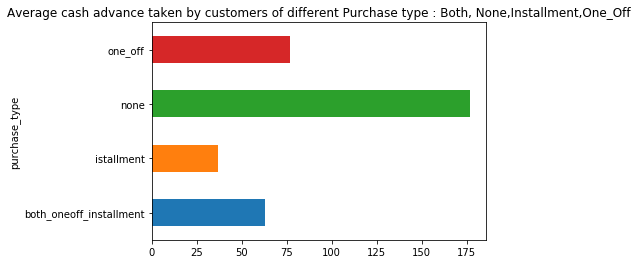

In [35]:
cust.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

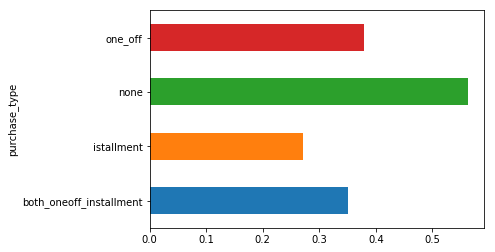

In [36]:
cust.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [37]:
# Original dataset with categorical column converted to number type.
cre_original=pd.concat([cust,pd.get_dummies(cust['purchase_type'])],axis=1)

In [38]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=cust.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,1,0,0,0
9,0,0,0,1


In [39]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [40]:
l=['purchase_type']
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [41]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE_FREQUENCY                   8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
Monthly_avg_purchase                8950 non-null float64
Monthly_cash_advance                8950 non-null float64
limit_usage                         8950 non-null float64
payment_minpay                      8950 non-null float64
both_oneoff_installment             8950 non-null uint8
istallment                          8950 non-null uint8
none                       

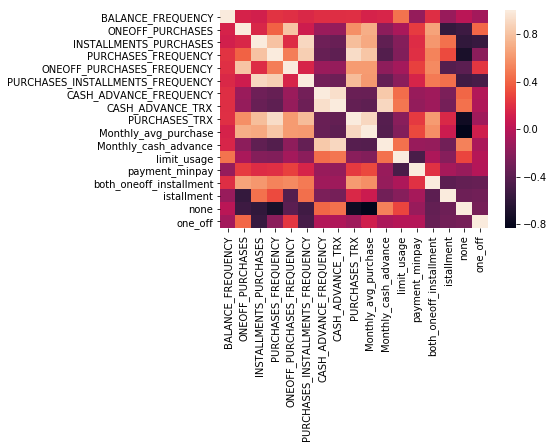

In [42]:
sns.heatmap(cr_dummy.corr())

In [43]:
from sklearn.preprocessing import  StandardScaler
# Standardizing Data 
sc=StandardScaler()
cr_scaled=sc.fit_transform(cr_dummy)


In [44]:
# Applying PCA to decrease the dimentionality 
from sklearn.decomposition import PCA
var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [45]:
var_ratio

{4: 0.8133040761376349,
 5: 0.878540580841572,
 6: 0.9201732887723827,
 7: 0.9423225835370869,
 8: 0.9623391568789227,
 9: 0.9746755559037908,
 10: 0.9840577404803665,
 11: 0.9899952599773799,
 12: 0.9929058593974451,
 13: 0.9955398934218748,
 14: 0.9979922582665381}

In [46]:
pc=PCA(n_components=7)

In [47]:
p=pc.fit(cr_scaled)

In [48]:
cr_scaled.shape

(8950, 17)

In [49]:
p.explained_variance_

array([6.8548132 , 3.07173632, 2.5111006 , 1.39006417, 1.10914451,
       0.70783512, 0.37658009])

In [50]:
var_ratio

{4: 0.8133040761376349,
 5: 0.878540580841572,
 6: 0.9201732887723827,
 7: 0.9423225835370869,
 8: 0.9623391568789227,
 9: 0.9746755559037908,
 10: 0.9840577404803665,
 11: 0.9899952599773799,
 12: 0.9929058593974451,
 13: 0.9955398934218748,
 14: 0.9979922582665381}

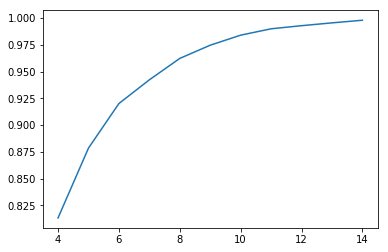

In [51]:
pd.Series(var_ratio).plot()

In [52]:
pc_final=PCA(n_components=7).fit(cr_scaled)
reduced_cr=pc_final.fit_transform(cr_scaled)

In [53]:
dd=pd.DataFrame(reduced_cr)

In [54]:
dd.head()

,0,1,2,3,4,5,6
0,0.238280,-2.770675,0.351752,-0.399105,-0.007466,0.015576,0.065044
1,3.982199,0.155472,-0.539140,1.054126,-0.402285,-0.593322,0.088243
2,-1.289972,1.507556,2.691261,-1.932404,-0.028846,-0.598416,1.704671
3,1.058498,0.662666,2.496995,-1.347186,0.749771,1.446119,-0.212900
4,1.446630,-0.173987,2.278758,-1.632218,-0.600577,-0.685051,-1.024653


In [55]:
col_list=cr_dummy.columns

In [56]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [58]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(7)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
BALANCE_FREQUENCY,-0.030430,0.238873,-0.267675,-0.348589,-0.232804,-0.692909,0.010774
ONEOFF_PURCHASES,-0.213464,0.406645,0.238024,-0.002427,-0.023990,0.132534,-0.127408
INSTALLMENTS_PURCHASES,-0.311394,-0.099124,-0.315352,0.090247,0.000138,0.117443,-0.169514
PURCHASES_FREQUENCY,-0.345325,0.016101,-0.163751,-0.076011,0.114744,-0.083043,0.292131
ONEOFF_PURCHASES_FREQUENCY,-0.214238,0.362557,0.161812,0.033778,-0.052553,-0.098455,0.557038
PURCHASES_INSTALLMENTS_FREQUENCY,-0.294855,-0.111953,-0.329968,0.024667,0.026490,0.007275,0.019808
CASH_ADVANCE_FREQUENCY,0.215188,0.285829,-0.277775,0.094390,0.361546,0.063033,0.081021
CASH_ADVANCE_TRX,0.230467,0.291207,-0.283725,0.099482,0.333886,0.081375,0.049722
PURCHASES_TRX,-0.355340,0.105843,-0.103552,-0.057057,0.104585,-0.007781,0.140420
Monthly_avg_purchase,-0.345634,0.141054,0.023280,-0.083326,0.194330,0.017607,-0.155803


In [60]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(7)])

PC_0    0.403179
PC_1    0.180670
PC_2    0.147695
PC_3    0.081759
PC_4    0.065237
PC_5    0.041633
PC_6    0.022149
dtype: float64

In [61]:
type(cr_pca)

sklearn.decomposition.pca.PCA

In [62]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=5,random_state=123)
km_4.fit(reduced_cr)
km_4.labels_

array([2, 3, 4, ..., 2, 3, 4])

In [63]:
pd.Series(km_4.labels_).value_counts()

2    2141
3    2080
1    1971
4    1871
0     887
dtype: int64

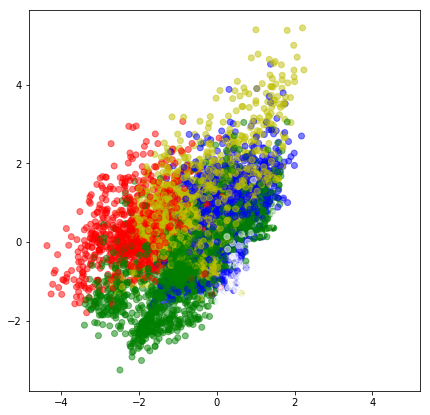

In [64]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'w'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,2],reduced_cr[:,3],c=label_color,cmap='Spectral',alpha=0.5)

In [66]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(7)])

In [67]:
df_pair_plot['Cluster']=km_4.labels_

C:\Users\raghu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\raghu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


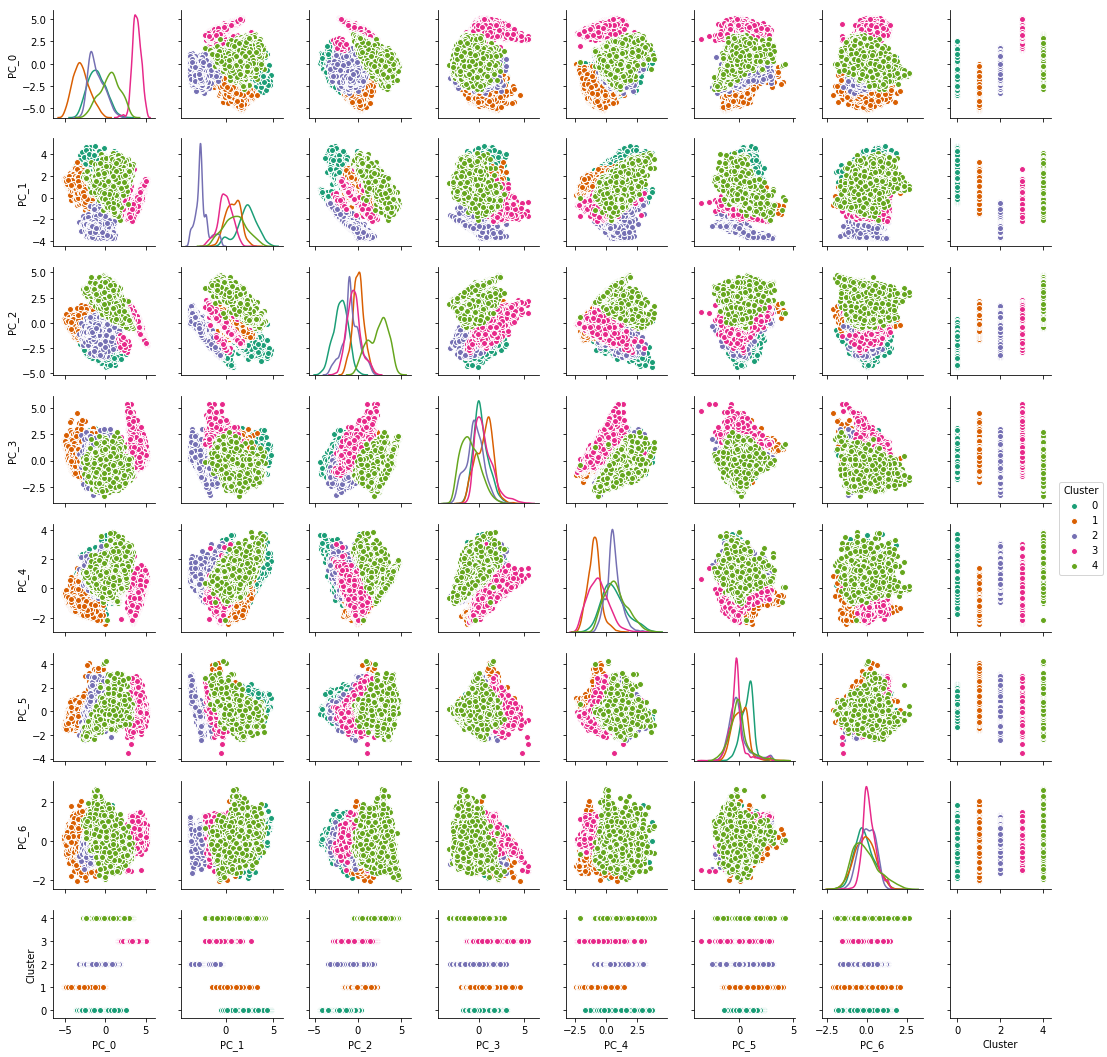

In [68]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [69]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [70]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.620717,3.199459,3.348077,0.361268,0.158699,0.270072,0.112929,0.813785,1.891305,3.046372,2.160831,0.294688,1.345475
std,0.145539,3.237351,3.075512,0.277317,0.216672,0.281852,0.154677,0.998266,1.365930,1.993794,2.423444,0.247833,0.901944
min,0.087011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040614,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.263891,1.105720
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.535461,1.947786
max,0.693147,8.808503,8.265455,0.693147,0.693147,0.693147,0.606136,3.401197,4.766523,7.260703,7.377151,1.109743,6.522176


In [71]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)


In [73]:
## Looking at only Data in cluster number 3
cluster_df_4.head()
cluster_df_4[cluster_df_4['Cluster_4']==3].head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
1,0.0,0.0,536.912124,0.457495,4.0,3.826241,0,0,0,1,7000.0,3
14,0.0,0.0,28.900949,0.924258,1.0,0.813816,0,0,0,1,3000.0,3
16,0.0,0.0,348.034338,0.690691,3.0,1.040881,0,0,0,1,3000.0,3
24,0.0,0.0,72.631806,0.894762,4.0,0.858615,0,0,0,1,6000.0,3
35,0.0,0.0,8.272031,0.920195,1.0,0.553919,0,0,0,1,1800.0,3


In [74]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4


Cluster_4,0,1,2,3,4
PURCHASES_TRX,26.774149,32.882369,11.750364,0.032212,6.878968
Monthly_avg_purchase,138.345634,189.384640,46.466161,0.086774,66.983930
Monthly_cash_advance,225.664102,4.012875,19.935322,178.680490,75.127333
limit_usage,0.597427,0.256213,0.247255,0.566056,0.377470
CASH_ADVANCE_TRX,9.400225,0.150178,0.519383,6.071635,2.771245
payment_minpay,3.508817,8.463578,4.060150,5.364625,5.226072
both_oneoff_installment,0.900789,1.000000,0.000000,0.000000,0.002138
istallment,0.095829,0.000000,1.000000,0.016346,0.000000
one_off,0.003382,0.000000,0.000000,0.001923,0.997862
none,0.000000,0.000000,0.000000,0.981731,0.000000


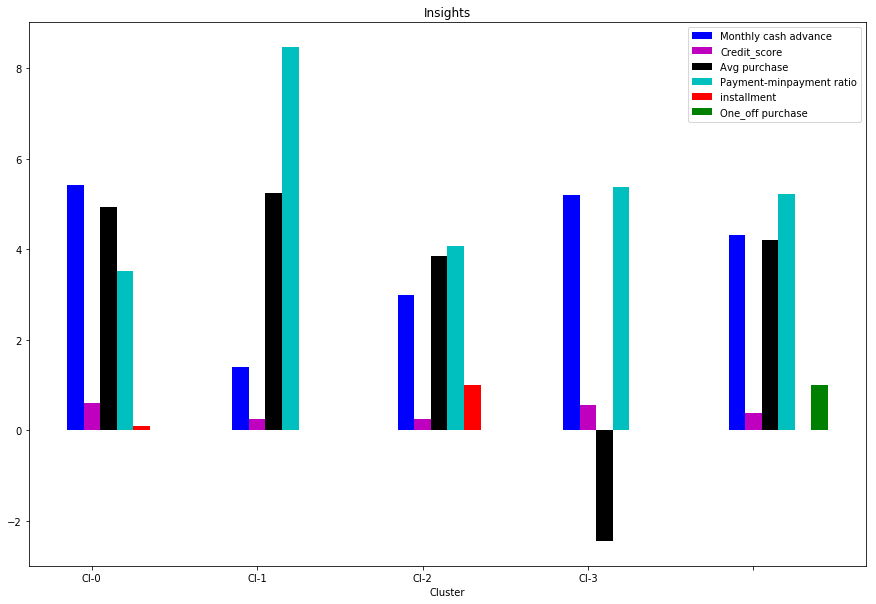

In [76]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

## ---
** Insights**

# Clusters are clearly distinguishing behavior within customers

---

<big>



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



In [78]:
# Findings through clustering is validating Insights dervied from KPI. (as shown above in Insights from KPI
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print(s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print("Cluster -4 ",'\n')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')


Cluster_4   
0          0     887
1          1    1971
2          2    2141
3          3    2080
4          4    1871
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0   887    9.910615
1  1971   22.022346
2  2141   23.921788
3  2080   23.240223
4  1871   20.905028 



In [79]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([2, 3, 4, ..., 2, 3, 4])

In [80]:
pd.Series(km_5.labels_).value_counts()

2    2141
3    2080
1    1971
4    1871
0     887
dtype: int64

Text(0,0.5,'PC_1')

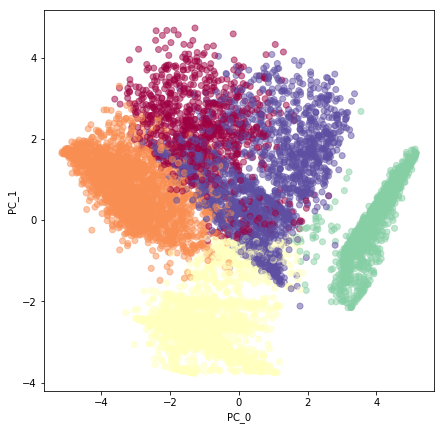

In [81]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [82]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [83]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,26.774149,32.882369,11.750364,0.032212,6.878968
Monthly_avg_purchase,138.345634,189.384640,46.466161,0.086774,66.983930
Monthly_cash_advance,225.664102,4.012875,19.935322,178.680490,75.127333
limit_usage,0.597427,0.256213,0.247255,0.566056,0.377470
CASH_ADVANCE_TRX,9.400225,0.150178,0.519383,6.071635,2.771245
payment_minpay,3.508817,8.463578,4.060150,5.364625,5.226072
both_oneoff_installment,0.900789,1.000000,0.000000,0.000000,0.002138
istallment,0.095829,0.000000,1.000000,0.016346,0.000000
one_off,0.003382,0.000000,0.000000,0.001923,0.997862
none,0.000000,0.000000,0.000000,0.981731,0.000000


# With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

*** So we don't have quite distinguishable characteristics with 5 clusters, ***

In [84]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print('\n',s1)


 Cluster_5   
0          0     887
1          1    1971
2          2    2141
3          3    2080
4          4    1871
Name: Cluster_5, dtype: int64


In [85]:
# percentage of each cluster
print("Cluster-5",'\n')
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print(pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5 

   Size  Percentage
0   887    9.910615
1  1971   22.022346
2  2141   23.921788
3  2080   23.240223
4  1871   20.905028


In [86]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([1, 0, 4, ..., 1, 0, 3])

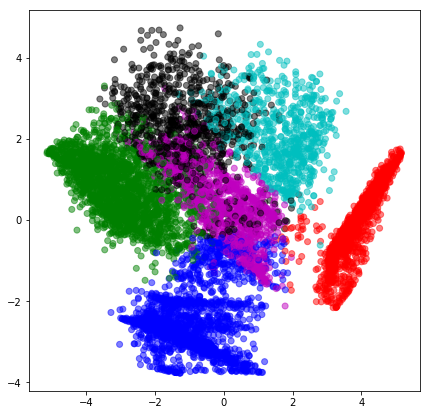

In [87]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [90]:
six_cluster_df_6=pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [95]:
six_cluster=six_cluster_df_6.groupby('Cluster_6')\
.apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,0.029398,11.745702,32.942511,5.690388,7.576633,26.921484
Monthly_avg_purchase,0.078945,46.464746,189.898699,50.969970,76.460416,138.243786
Monthly_cash_advance,178.374960,20.185138,3.971581,201.362283,3.791838,223.215618
limit_usage,0.565832,0.248263,0.256672,0.605568,0.244097,0.595687
CASH_ADVANCE_TRX,6.057831,0.532867,0.148242,7.446839,0.138047,9.296716
payment_minpay,5.371042,4.054433,8.486876,3.157518,6.411180,3.519471
both_oneoff_installment,0.000000,0.000000,1.000000,0.000000,0.007576,0.908267
istallment,0.015904,1.000000,0.000000,0.001437,0.000000,0.091733
one_off,0.000000,0.000000,0.000000,0.998563,0.992424,0.000000
none,0.984096,0.000000,0.000000,0.000000,0.000000,0.000000


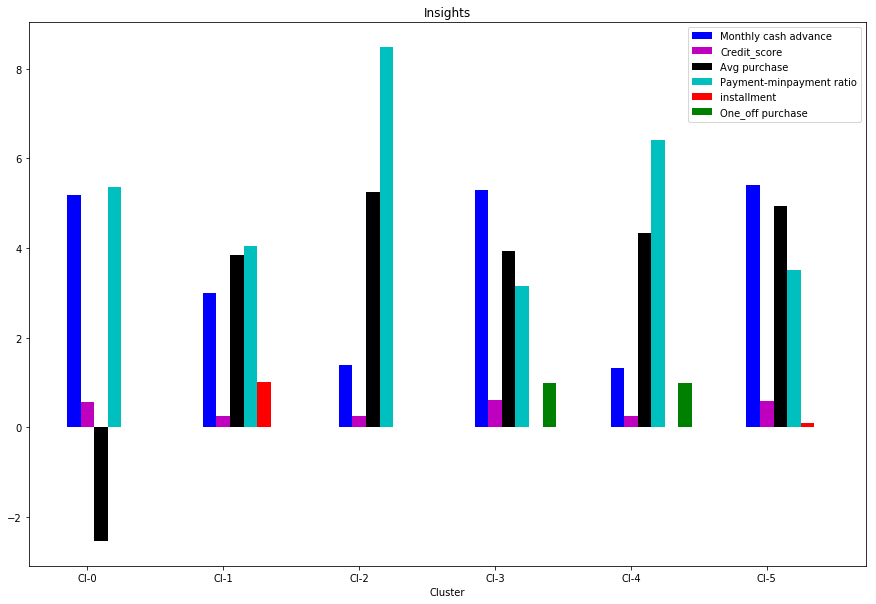

In [96]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [97]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance


array([5.18388785, 3.00494661, 1.37916419, 5.30510569, 1.33285096,
       5.4081382 ])

## Insights with  6 clusters

- Here also groups are overlapping .
     - Cl-0 and Cl-2 behaving same 

# Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [98]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

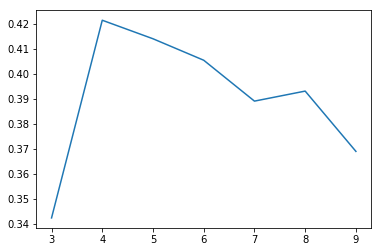

In [99]:
pd.Series(score).plot()

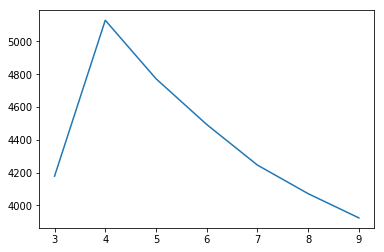

In [100]:
pd.Series(score_c).plot()

### Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.

<big>
*** Insights with 4 Clusters ***



---

<big>



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side *** This group is about 21% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***

# Marketing Strategy Suggested:

## a. Group 2
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
## b. Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
## c. Group 0
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
## d. Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.